#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo 
* `StreamingMovies`: assinatura de streaming de filmes 
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

<h3>Importação das bibliotecas</h3>

In [39]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

<h3>Importação dos dados (Extract)</h3>

In [2]:
response = requests.get(
    url=r'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
)

dados_json = response.json()

In [3]:
json_original = pd.DataFrame(dados_json) # Conversão para dataframe

<h3>Normalização separada de cada coluna</h3>

In [4]:
customer = pd.json_normalize(
    json_original[
        'customer'
    ]
)

phone = pd.json_normalize(
    json_original[
        'phone'
    ]
)

internet = pd.json_normalize(
    json_original[
        'internet'
    ]
)

account = pd.json_normalize(
    json_original[
        'account'
    ]
)

<h3>Junção de todas as colunas</h3>

In [5]:
df_original = pd.concat([
    json_original[['customerID', 'Churn']],
    customer, phone, internet, account
], axis=1)

In [6]:
# df_final.T

<h3>Análise exploratória (Transform)</h3>

In [7]:
# df_final.columns

In [8]:
df_original.dtypes # Obs: Charges.Total deveria ser float

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object

In [9]:
df_original['Charges.Total'] = df_original['Charges.Total'].map(lambda x: x.strip())
df_original['Charges.Total'] = df_original['Charges.Total'].map(lambda x: np.nan if x == '' else x)

In [10]:
df_original['Charges.Total'] = df_original['Charges.Total'].astype(float)

In [11]:
df_original['Charges.Total'].dtype # Tipo correto agora

dtype('float64')

##### Variáveis de interesse

* `Churn`
* `gender`
* `SeniorCitizen`
* `Partner`
* `Dependents`
* `tenure`
* `PhoneService`
* `MultipleLines`
* `InternetService`
* `OnlineSecurity`
* `OnlineBackup`
* `DeviceProtection`
* `TechSupport`
* `StreamingTV`
* `StreamingMovies`
* `Contract`
* `PaperlessBilling`
* `PaymentMethod`
* `Charges.Monthly`

In [12]:
df_original.shape

(7267, 21)

In [13]:
df_original.head(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [14]:
df_original.tail(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.60


In [15]:
df_original.nunique()

customerID          7267
Churn                  3
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Charges.Monthly     1585
Charges.Total       6530
dtype: int64

In [16]:
df_original['customerID'].duplicated().sum() # Nenhum cliente duplicado

np.int64(0)

In [17]:
df_original['customerID'].isnull().sum()

np.int64(0)

In [18]:
df_original['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [19]:
df_original[df_original['Churn'] == ''].head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45


In [20]:
# Verificando a porcentagem de 'Churn' nulos.

print(
    f'{round(df_original[df_original['Churn'] == ''].shape[0] / df_original.shape[0] * 100, 2)}%'
)

3.08%


In [21]:
df_final = df_original[df_original['Churn'] != '']
# df_original.nunique()

In [22]:
df_final = df_final.dropna(subset=['Charges.Total'])

In [23]:
# Criação da coluna 'Charges.Diary'

df_final['Charges.Diary'] = (df_final['Charges.Monthly'] / 30).round(2)

df_final['Charges.Diary'].dtype

dtype('float64')

In [24]:
# df_final.head()

<h3>Padronização do dataframe</h3>

In [25]:
df_padronizado = df_final.copy(deep=True)

In [26]:
cols = [
    'Churn',
    'gender',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

In [27]:
for col in cols:
    print(f'{col}: {df_padronizado[col].unique()}')

Churn: ['No' 'Yes']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [28]:
pd.set_option('future.no_silent_downcasting', True)

cols_binarias = [
    'Churn',
    'gender',
    'Partner',
    'Dependents',
    'PhoneService',
    'PaperlessBilling'
]

df_padronizado[cols_binarias] = df_padronizado[cols_binarias].replace(
    {
        'Yes': 1,
        'No': 0,
        'Female': 1,
        'Male': 0
    }
).astype(int)

In [29]:
cols_trinarias = [
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

df_padronizado[cols_trinarias] = df_padronizado[cols_trinarias].replace(
    {
        'No phone service': 'No',
        'No internet service': 'No'
    }
)

df_padronizado[cols_trinarias] = df_padronizado[cols_trinarias].replace(
    {
        'Yes': 1,
        'No': 0
    }
)

In [30]:
# df_padronizado

In [31]:
df_padronizado['Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [32]:
df_padronizado['PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [33]:
one_hot_contract = pd.get_dummies(df_padronizado['Contract'], prefix='Contract_', dtype=int, drop_first=True)

In [34]:
one_hot_payment = pd.get_dummies(df_padronizado['PaymentMethod'], prefix='Payment_Method_', dtype=int, drop_first=True)

In [35]:
# one_hot_contract

In [36]:
# one_hot_contract

In [37]:
df_padronizado = pd.concat([df_padronizado.drop(columns=['Contract', 'PaymentMethod']), one_hot_contract, one_hot_payment], axis=1)

<h3>Análise descritiva (Load)</h3>

In [38]:
df_final.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Charges.Diary
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159891
std,0.368844,24.545260,30.085974,2266.771362,1.002955
min,0.000000,1.000000,18.250000,18.800000,0.610000
25%,0.000000,9.000000,35.587500,401.450000,1.187500
50%,0.000000,29.000000,70.350000,1397.475000,2.340000
75%,0.000000,55.000000,89.862500,3794.737500,2.992500
max,1.000000,72.000000,118.750000,8684.800000,3.960000


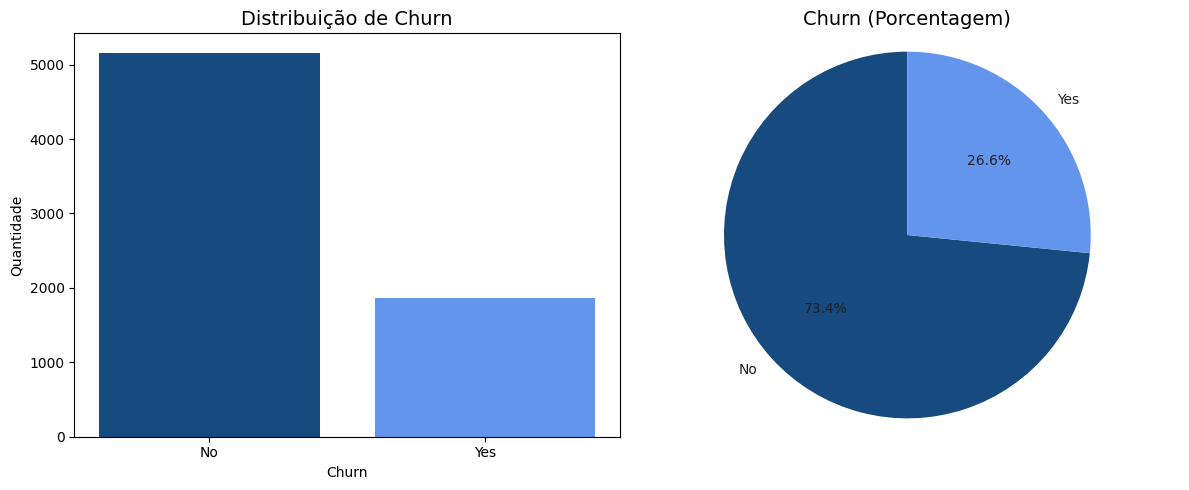

In [73]:
from utils.plot_utils import plot_categoria

plot_categoria(df_final, 'Churn')